<p style="font-family: Arial; font-size:2.0em; color:#3323C0">
Classifying YouTube viewers based on number of views<br> 
    
[YouTube Dataset link](https://www.kaggle.com/datasnaek/youtube)</p>

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
Data procecsssing for machine learning </p>

* update October 30, 2019
* Update November 18, 2019
* last update Decemebr 4, 2019

### <font color="blue">**Import necssary packages**</font>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import glob

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)
# pd.set_option("display.latex.repr", False)
# Setup Seaborn
# sns.set_style("whitegrid")
# sns.set_context("poster") # poster

In [4]:
df_us_video_with_category_title = pd.read_csv("./df_us_video.csv")

In [5]:
df_us_video_with_category_title.head(4)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,Category_title
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED YOUTUBE FOREVER!,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|pa...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,2017-09-13,Entertainment
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|F...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,2017-09-13,Science & Technology
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,2017-09-13,People & Blogs
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|ap...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,2017-09-13,Science & Technology


<p style="font-family: Times New Roman; font-size:1.5em; color:blue">
Drop columns -- "video_id", "title", "category_id", "tags", "thumbnail_link" </p>

In [6]:
df_us_video_with_category_title.drop(columns=["title", "video_id", "category_id", "tags", "thumbnail_link"], inplace=True)

In [7]:
df_us_video_cleaned = df_us_video_with_category_title.copy()

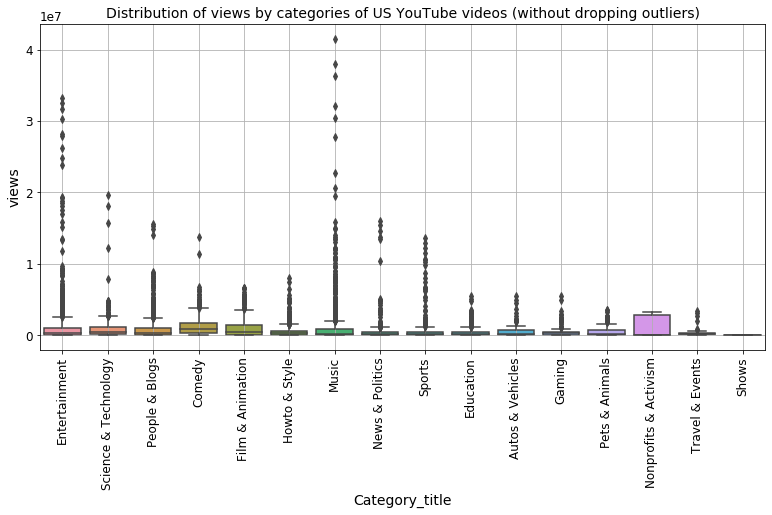

In [8]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(x='Category_title', y="views", data=df_us_video_cleaned)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Distribution of views by categories of US YouTube videos (without dropping outliers)", fontsize=14)
plt.grid(True)
plt.show()

<p style="font-family: Times New Roman; font-size:1.5em; color:blue">
Drop extereme lower and higher views </p>

- We observe exterme values at both ends, i.e., both small and large number of views

* __drop views: 3000 or fewer and 1 million or more views__ 

In [9]:
df_us_video_cleaned_v1 = df_us_video_cleaned[df_us_video_cleaned["views"]>=3000]
df_us_video_cleaned_v1 = df_us_video_cleaned[df_us_video_cleaned["views"]<=1000000]

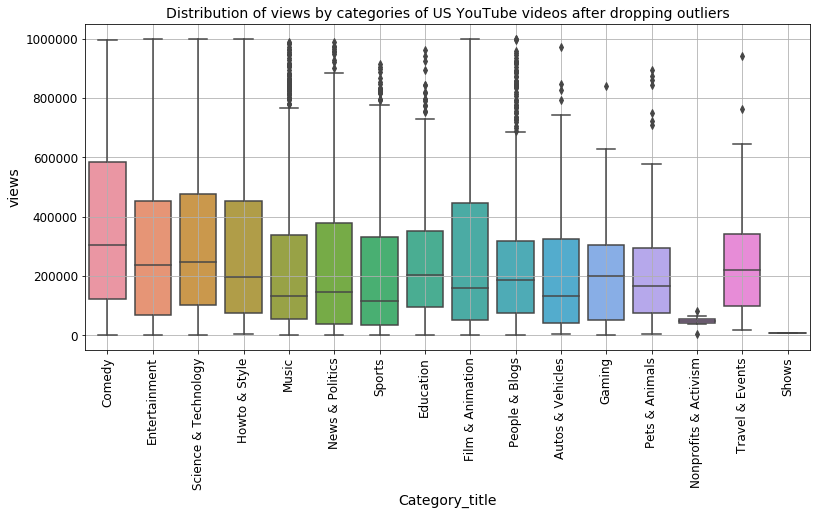

In [10]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(x='Category_title', y="views", data=df_us_video_cleaned_v1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Distribution of views by categories of US YouTube videos after dropping outliers", fontsize=14)
plt.grid(True)
plt.show()

In [11]:
df_us_video_cleaned_v1["date"] = df_us_video_cleaned_v1["date"].apply(lambda x:pd.to_datetime(str(x)))

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<p style="font-family: Times New Roman; font-size:1.85em; color:green">
Add features -- "day" and "month" and "weekday/weekend"</p>

In [12]:
df_us_video_cleaned_v1["day"] = df_us_video_cleaned_v1["date"].dt.day_name(locale="English")

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_us_video_cleaned_v1["month"] = df_us_video_cleaned_v1["date"].dt.month_name(locale="English")

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_us_video_cleaned_v1['Weekday/weekend'] = df_us_video_cleaned_v1["day"].apply(lambda x: "weekend" if x in ["Saturday", "Sunday"] else "weekday")

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_us_video_cleaned_v1.head()

,channel_title,views,likes,dislikes,comment_total,date,Category_title,day,month,Weekday/weekend
6,Late Night with Seth Meyers,666169,9985,297,1071,2017-09-13,Comedy,Wednesday,September,weekday
10,CollegeHumor,859289,34485,726,1914,2017-09-13,Comedy,Wednesday,September,weekday
11,Awkward Puppets,452477,28050,405,2745,2017-09-13,Comedy,Wednesday,September,weekday
12,The Tonight Show Starring Jimmy Fallon,258781,8085,303,726,2017-09-13,Comedy,Wednesday,September,weekday
13,MTV,274358,9215,477,838,2017-09-13,Entertainment,Wednesday,September,weekday


<p style="font-family: Times New Roman; font-size:1.85em; color:green">
Check relationshsip among features <br> </p>

<br>
<p style="font-family: Times New Roman; font-size:1.85em; color:green">
Relationship by months</p>

C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


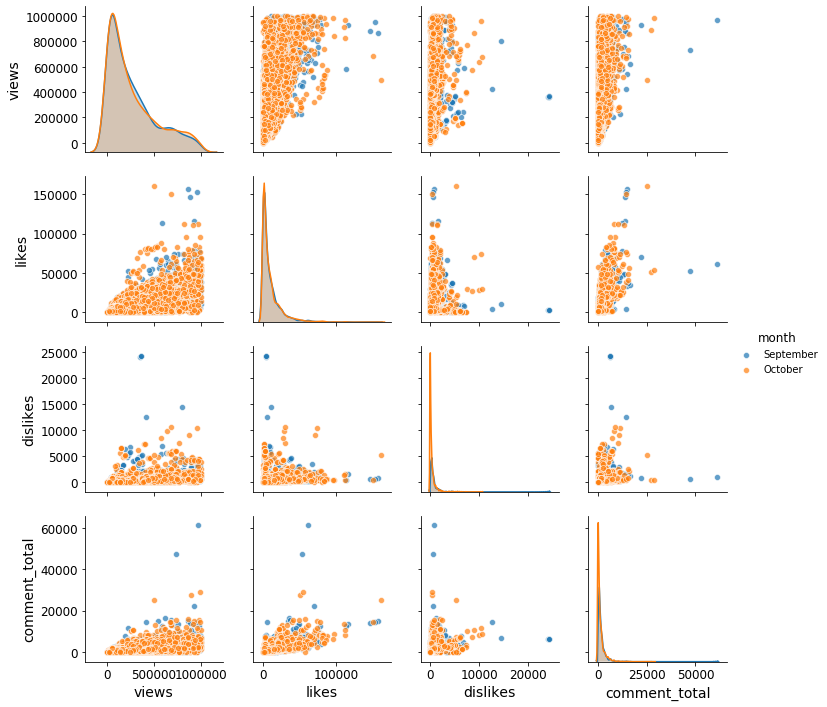

In [16]:
sns.pairplot(data=df_us_video_cleaned_v1, hue="month", plot_kws=dict(alpha=0.7))
plt.show()

<br>
<p style="font-family: Times New Roman; font-size:1.85em; color:green">
Relationship by days of the week</p>

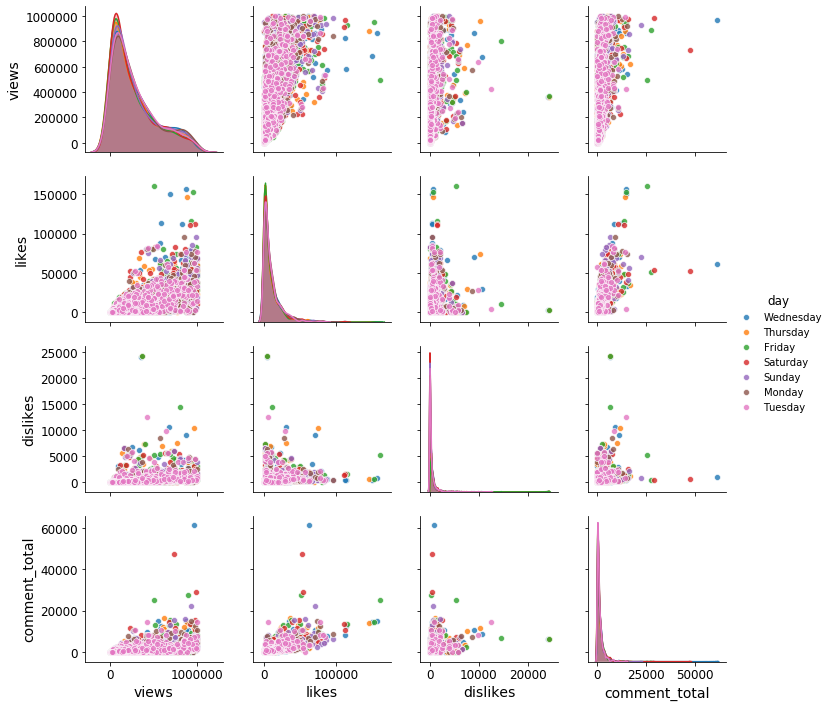

In [17]:
sns.pairplot(data=df_us_video_cleaned_v1, hue="day", plot_kws=dict(alpha=0.8))
plt.show()

<br>
<p style="font-family: Times New Roman; font-size:1.85em; color:green">
Relationship by whether the day is  weekday or weekend</p>

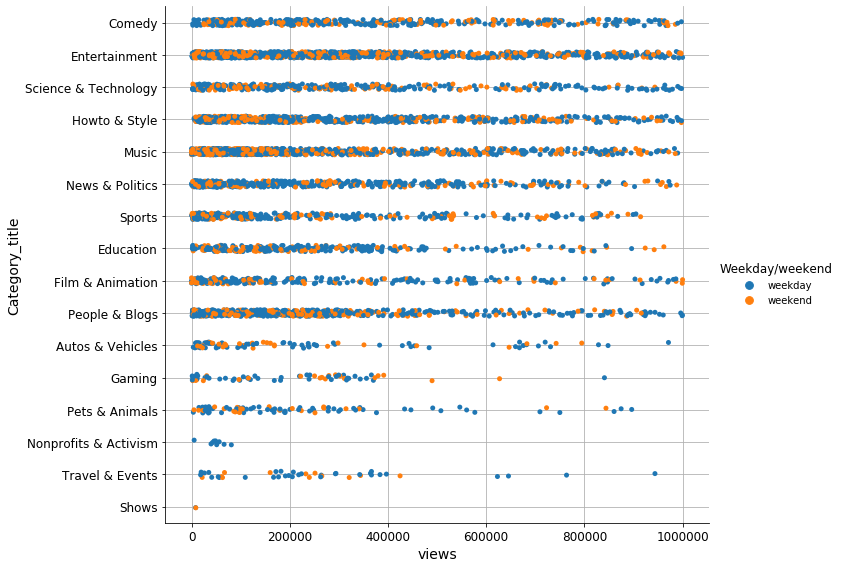

In [18]:
sns.catplot(y='Category_title', x='views', hue='Weekday/weekend', data = df_us_video_cleaned_v1, aspect=1.3, height=8)
plt.grid(True)
plt.show()

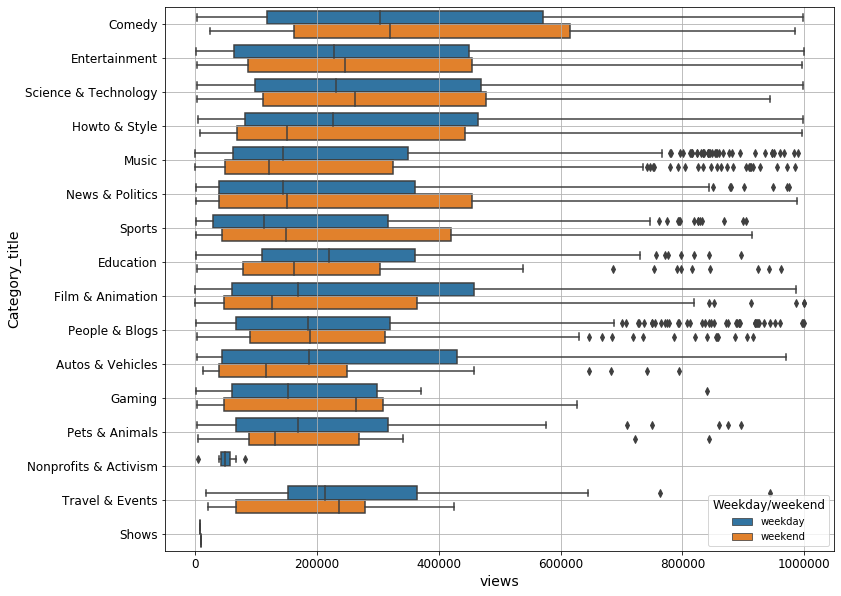

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x="views", y="Category_title", hue="Weekday/weekend", data=df_us_video_cleaned_v1)
plt.grid(True)
plt.show()


<p style="font-family: Times New Roman; font-size:1.75em; color:green">
<br>Add features -- "viewer_class": low, medium, high, extreme<br></p>



<p style="font-family: Times New Roman; font-size:1.75em; color:green">
low (less than 25% views, q = 0.25), medium (50% views), high (75% views), extreme<br></p>


In [20]:
df_us_video_cleaned_v1["viewer_class"] = pd.qcut(x=df_us_video_cleaned_v1["views"], q= [0, 0.25, 0.5, 0.75, 1], labels=["low", "medium", "high", "extreme"])

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<br>
<p style="font-family: Times New Roman; font-size:1.85em; color:blue">
Relationship viewer classes</p>

C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


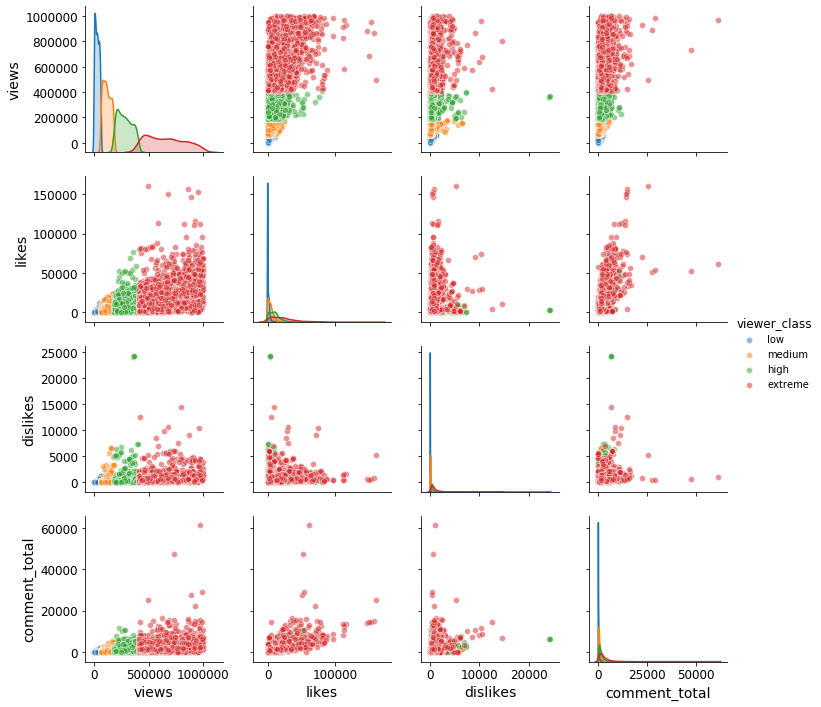

In [21]:
sns.pairplot(data=df_us_video_cleaned_v1, hue="viewer_class", plot_kws=dict(alpha=0.5))
plt.show()

In [22]:
dates = df_us_video_cleaned_v1.pop("date")

In [23]:
df_us_ml = df_us_video_cleaned_v1.copy()

#### Arrange the columns the dataframe

In [24]:
df_us_ml = df_us_ml[["channel_title", "Category_title", "views", "likes", "dislikes", "comment_total","day", "month", "Weekday/weekend", "viewer_class"]]

In [25]:
df_us_ml.head(3)

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend,viewer_class
6,Late Night with Seth Meyers,Comedy,666169,9985,297,1071,Wednesday,September,weekday,extreme
10,CollegeHumor,Comedy,859289,34485,726,1914,Wednesday,September,weekday,extreme
11,Awkward Puppets,Comedy,452477,28050,405,2745,Wednesday,September,weekday,extreme


In [26]:
df_us_ml_v1 = df_us_ml.reset_index(drop=True)

In [27]:
df_us_ml_v1.head(5)

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend,viewer_class
0,Late Night with Seth Meyers,Comedy,666169,9985,297,1071,Wednesday,September,weekday,extreme
1,CollegeHumor,Comedy,859289,34485,726,1914,Wednesday,September,weekday,extreme
2,Awkward Puppets,Comedy,452477,28050,405,2745,Wednesday,September,weekday,extreme
3,The Tonight Show Starring Jimmy Fallon,Comedy,258781,8085,303,726,Wednesday,September,weekday,high
4,MTV,Entertainment,274358,9215,477,838,Wednesday,September,weekday,high


In [28]:
df_us_ml_v1.tail(5)

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend,viewer_class
6057,Life Noggin,Education,440393,14362,390,1575,Sunday,October,weekend,extreme
6058,Business Insider,News & Politics,55762,1265,760,1873,Sunday,October,weekend,low
6059,LP,Music,142908,7088,68,437,Sunday,October,weekend,medium
6060,YouTube FanFest,Entertainment,24532,2148,77,0,Sunday,October,weekend,low
6061,National Science Foundation,Science & Technology,144039,1574,59,0,Sunday,October,weekend,medium


<br>
<p style="font-family: Times New Roman; font-size:2.5em; color:blue">
Divide the dataset into train, test, and validation sets</p>
<br>


In [29]:
from sklearn import model_selection
from sklearn import preprocessing

<p style="font-family: Times New Roman; font-size:2.0em; color:blue">
Label encoding to convert categorical features into numerical representations</p>
<br>

In [30]:
df_us_ml_v2 = df_us_ml_v1.copy()

In [31]:
lbl_encd = preprocessing.LabelEncoder()

In [32]:
categorical_columns = ["channel_title", "Category_title", "day", "month", "Weekday/weekend", "viewer_class"]

In [33]:
df_us_ml_v2[categorical_columns] = df_us_ml_v2[categorical_columns].apply(lambda col: lbl_encd.fit_transform(col))

In [34]:
df_us_ml_v2.head(5)

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend,viewer_class
0,535,1,666169,9985,297,1071,6,1,0,0
1,211,1,859289,34485,726,1914,6,1,0,0
2,75,1,452477,28050,405,2745,6,1,0,0
3,923,1,258781,8085,303,726,6,1,0,1
4,580,3,274358,9215,477,838,6,1,0,1


In [35]:
df_us_ml_v2.tail(3)

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend,viewer_class
6059,528,7,142908,7088,68,437,3,0,1,3
6060,1051,3,24532,2148,77,0,3,0,1,2
6061,655,12,144039,1574,59,0,3,0,1,3


In [36]:
print(lbl_encd.inverse_transform(df_us_ml_v2["viewer_class"]))

['extreme' 'extreme' 'extreme' ... 'medium' 'low' 'medium']


### Class encoding -- extreme: 0, high: 1, low: 2, medium: 3

In [37]:
numerical_columns = ["views", "likes", "dislikes", "comment_total"]

<br>
<p style="font-family: Times New Roman; font-size:1.55em; color:blue">
MinMaxScaler: (data - min)/(max-min) sacles 0 to 1; preserves the same distribution; keep the effect of outliers</p>
<br>

In [38]:
minmaxscaler = preprocessing.MinMaxScaler()

In [39]:
df_us_ml_v2[numerical_columns] = minmaxscaler.fit_transform(df_us_ml_v2[numerical_columns])

C:\Users\elias\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [40]:
df_us_ml_v2.head()

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend,viewer_class
0,535,1,0.666225,0.062138,0.012219,0.017506,6,1,0,0
1,211,1,0.859361,0.214606,0.029869,0.031285,6,1,0,0
2,75,1,0.452515,0.174560,0.016663,0.044868,6,1,0,0
3,923,1,0.258803,0.050314,0.012466,0.011867,6,1,0,1
4,580,3,0.274381,0.057346,0.019625,0.013698,6,1,0,1


In [41]:
df_us_ml_v2.shape

(6062, 10)

<br>
<p style="font-family: Times New Roman; font-size:3.55em; color:green">
Input features</p>
<br>

In [42]:
X = df_us_ml_v2.drop(columns=["viewer_class"])

In [43]:
X.head()

,channel_title,Category_title,views,likes,dislikes,comment_total,day,month,Weekday/weekend
0,535,1,0.666225,0.062138,0.012219,0.017506,6,1,0
1,211,1,0.859361,0.214606,0.029869,0.031285,6,1,0
2,75,1,0.452515,0.174560,0.016663,0.044868,6,1,0
3,923,1,0.258803,0.050314,0.012466,0.011867,6,1,0
4,580,3,0.274381,0.057346,0.019625,0.013698,6,1,0


<br>
<p style="font-family: Times New Roman; font-size:2.55em; color:green">
Response categories</p>
<br>

In [44]:
Y = df_us_ml_v2[["viewer_class"]]

In [45]:
Y.head()

,viewer_class
0,0
1,0
2,0
3,1
4,1


In [46]:
X_array = np.asanyarray(X)
y_array = np.asanyarray(Y)

In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=0.2, \
                                                                    random_state=0) 

In [52]:
# X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size=0.5, \
#                                                                  random_state=42) 

In [53]:
X_train_df = pd.DataFrame(X_train, columns=['channel_title', 'category', "views", "likes", \
                                            "dislikes", "comment_total", "day",'month', 'weekday_weekend'])
y_train_df = pd.DataFrame(y_train, columns=['viewer_class'])

# X_val_df = pd.DataFrame(X_val, columns=['channel_title', 'category', "views", "likes", \
#                                             "dislikes", "comment_total", "day",'month', 'weekday_weekend'])
# y_val_df = pd.DataFrame(y_val, columns=['viewer_class'])

X_test_df = pd.DataFrame(X_test, columns=['channel_title', 'category', "views", "likes", \
                                            "dislikes", "comment_total", "day",'month', 'weekday_weekend'])
y_test_df = pd.DataFrame(y_test, columns=['viewer_class'])


In [54]:

print("Percent of training data: {}%".format(round(X_train_df.shape[0]/X.shape[0],2)*100))
print()
# print("Percent of validation data: {}%".format(round(X_val_df.shape[0]/X.shape[0],2)*100))
# print()
print("Percent of test data: {}%".format(round(X_test_df.shape[0]/X.shape[0],2)*100))

Percent of training data: 80.0%

Percent of test data: 20.0%



<p style="font-family: Times New Roman; font-size:2.5em; color:blue">
save files </p>
<br>

In [55]:
X_train_df.to_csv("./ML_test_3/X_train_df_2.csv", index=False)
y_train_df.to_csv("./ML_test_3/y_train_df_2.csv", index=False)

# # X_val_df.to_csv("./ML_test_3/X_val_df_1.csv", index=False)
# # y_val_df.to_csv("./ML_test_3/y_val_df_1.csv", index=False)

X_test_df.to_csv("./ML_test_3/X_test_df_2.csv", index=False)
y_test_df.to_csv("./ML_test_3/y_test_df_2.csv", index=False)